In [18]:
from epitome.dataset import *
from epitome.models import *
import pickle

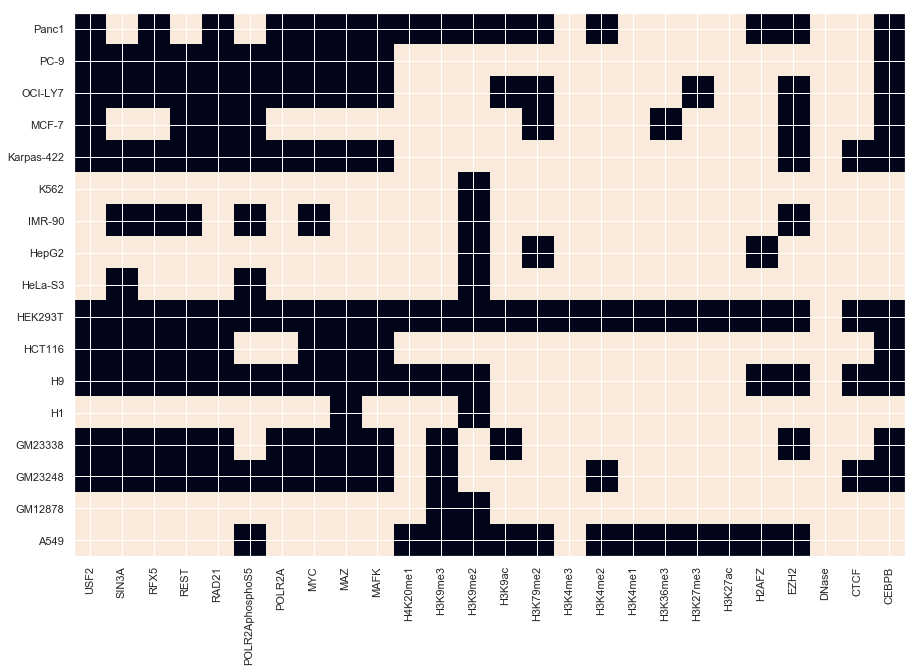

In [3]:
dataset = EpitomeDataset(min_cells_per_target = 7)
dataset.view()

### Select few distinct TFs

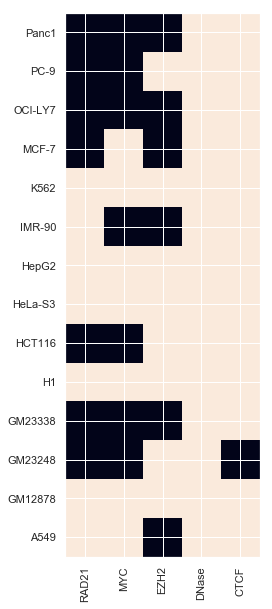

In [5]:
targets = ['CTCF','MYC','RAD21', 'EZH2']
smaller_dataset = EpitomeDataset(targets=targets)
smaller_dataset.view()

### Train Multiclass Model

In [6]:
model = EpitomeModel(smaller_dataset, test_celltypes = ["K562"])
model.train(5000)

using ['Panc1', 'PC-9', 'OCI-LY7', 'MCF-7', 'IMR-90', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23338', 'GM23248', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['Panc1', 'PC-9', 'OCI-LY7', 'MCF-7', 'IMR-90', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23338', 'GM23248', 'GM12878', 'A549'] as labels for mode Dataset.VALID
using ['K562'] as labels for mode Dataset.TEST
INFO:tensorflow:Starting Training
Batch:  0
	Loss:  34.9093132
Batch:  1000
	Loss:  8.76386833
Batch:  2000
	Loss:  7.78539
Batch:  3000
	Loss:  8.86331
Batch:  4000
	Loss:  10.0990133
Batch:  5000
	Loss:  10.2204905


(0, 5000, [])

In [10]:
result = model.test(1000, calculate_metrics=True)

100%|██████████| 16/16 [00:00<00:00, 18.59it/s]

INFO:tensorflow:macro auROC:     0.9827501534683856
INFO:tensorflow:auPRC:     0.7232184200676244



/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:815: RuntimeWarning: invalid value encountered in true_divide
  precision = tps / (tps + fps)
/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:951: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:815: RuntimeWarning: invalid value encountered 

In [11]:
results = {}
results["multi"] = result
results

{'multi': {'preds': array([[0.00074717, 0.0004811 , 0.00085035, 0.02758867],
         [0.0009661 , 0.00054872, 0.00063989, 0.02967763],
         [0.00074717, 0.0004811 , 0.00085035, 0.02758867],
         ...,
         [0.00138676, 0.00047415, 0.00090599, 0.02833128],
         [0.00072595, 0.00055507, 0.00100145, 0.02406591],
         [0.00073457, 0.00052586, 0.00097057, 0.02531627]], dtype=float32),
  'truth': array([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         ...,
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]], dtype=float32),
  'weights': array([[0., 0., 0., 1.],
         [0., 0., 1., 1.],
         [0., 0., 0., 1.],
         ...,
         [0., 0., 0., 1.],
         [0., 0., 1., 0.],
         [1., 1., 1., 1.]], dtype=float32),
  'target_dict': {'RAD21': {'AUC': 1.0,
    'auPRC': 1.0,
    'GINI': 0.9927146745155144},
   'MYC': {'AUC': nan, 'auPRC': nan, 'GINI': -0.13899615945652719},
   'EZH2': {'AUC': nan, 'auPRC':

### Train single class model

In [15]:
results = {}

for target in targets:
    single_tf_dataset = EpitomeDataset(targets=[target])
    model = EpitomeModel(single_tf_dataset, test_celltypes = ["K562"])
    model.train(5000)
    results[target] = model.test(1000, calculate_metrics=True)

using ['Panc1', 'PC-9', 'OCI-LY7', 'MCF-7', 'IMR-90', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23338', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['Panc1', 'PC-9', 'OCI-LY7', 'MCF-7', 'IMR-90', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23338', 'GM12878', 'A549'] as labels for mode Dataset.VALID
using ['K562'] as labels for mode Dataset.TEST
INFO:tensorflow:Starting Training
Batch:  0
	Loss:  43.1474876
Batch:  1000
	Loss:  0.217702925
Batch:  2000
	Loss:  0.0524696261
Batch:  3000
	Loss:  4.25538731
Batch:  4000
	Loss:  7.38463068
Batch:  5000
	Loss:  0.0290552191


100%|██████████| 16/16 [00:00<00:00, 20.13it/s]

INFO:tensorflow:macro auROC:     0.973693143245078
INFO:tensorflow:auPRC:     0.4247497941635002


using ['MCF-7', 'HepG2', 'HeLa-S3', 'H1', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['MCF-7', 'HepG2', 'HeLa-S3', 'H1', 'GM12878', 'A549'] as labels for mode Dataset.VALID
using ['K562'] as labels for mode Dataset.TEST
INFO:tensorflow:Starting Training
Batch:  0
	Loss:  45.6662521
Batch:  1000
	Loss:  0.147083938
Batch:  2000
	Loss:  0.0671809912
Batch:  3000
	Loss:  0.0328150764
Batch:  4000
	Loss:  0.020641081
Batch:  5000
	Loss:  0.0367331058


100%|██████████| 16/16 [00:00<00:00, 20.42it/s]

INFO:tensorflow:macro auROC:     0.9999999999999999
INFO:tensorflow:auPRC:     1.0


using ['IMR-90', 'HepG2', 'HeLa-S3', 'H1', 'GM12878', 'A549'] as labels for mode Dataset.TRAIN
using ['IMR-90', 'HepG2', 'HeLa-S3', 'H1', 'GM12878', 'A549'] as labels for mode Dataset.VALID
using ['K562'] as labels for mode Dataset.TEST
INFO:tensorflow:Starting Training
Batch:  0
	Loss:  35.3753738
Batch:  1000
	Loss:  7.37154198
Batch:  2000
	Loss:  7.23343325
Batch:  3000
	Loss:  0.0491655618
Batch:  4000
	Loss:  16.3124752
Batch:  5000
	Loss:  7.03397417


100%|██████████| 16/16 [00:00<00:00, 20.50it/s]

INFO:tensorflow:macro auROC:     0.9932898244323927
INFO:tensorflow:auPRC:     0.6394755970307753


using ['PC-9', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23248', 'GM12878'] as labels for mode Dataset.TRAIN
using ['PC-9', 'HepG2', 'HeLa-S3', 'HCT116', 'H1', 'GM23248', 'GM12878'] as labels for mode Dataset.VALID
using ['K562'] as labels for mode Dataset.TEST
INFO:tensorflow:Starting Training
Batch:  0
	Loss:  37.2028198
Batch:  1000
	Loss:  0.261966527
Batch:  2000
	Loss:  0.195913523
Batch:  3000
	Loss:  0.0303567126
Batch:  4000
	Loss:  24.6949081
Batch:  5000
	Loss:  0.0183634013


100%|██████████| 16/16 [00:00<00:00, 20.47it/s]

INFO:tensorflow:macro auROC:     nan
INFO:tensorflow:auPRC:     nan



/Users/jahnavisingh/anaconda3/envs/EpitomeEnv3/lib/python3.7/site-packages/sklearn/metrics/_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]
/Users/jahnavisingh/Dropbox/Berkeley/Research/Yosef/epitome/epitome/epitome/models.py:531: RuntimeWarning: Mean of empty slice
  auROC = np.nanmean(list(map(lambda x: x['AUC'],target_dict.values())))
/Users/jahnavisingh/Dropbox/Berkeley/Research/Yosef/epitome/epitome/epitome/models.py:532: RuntimeWarning: Mean of empty slice
  auPRC = np.nanmean(list(map(lambda x: x['auPRC'],target_dict.values())))


In [16]:
results['multi'] = result

### Save test results

In [19]:
with open('multi_label_results.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [20]:
with open('multi_label_results.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)